In [14]:
import math as np
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd


In [15]:
# Question one
# A piece of paper is 1mm thick. Assuming you can fold it as many times as you want, how many folds would it take to exceed the
#height of Mount Everest at 8,848 m?

#***********************Solution****************************

init_paper_thickness = 0.001  # converted mm to m
mount_everest = 8848 # in meters
current_thickness = init_paper_thickness
number_of_folds = 0
for _ in itertools.count():
    if current_thickness > mount_everest:
        break
    current_thickness *= 2
    number_of_folds += 1

print (f"The number of folds to exceed the height of Mount Everest is: {number_of_folds}")

The number of folds to exceed the height of Mount Everest is: 24


In [16]:
# Question two
#The volume of water in a reservoir decreases at an exponential rate, following v(t) = v(0)exp(-at) with a=0.1. How much time, t,
# does it take for the volume to decrease to less than one-half of its initial volume, v(0)?

#***********************Solution****************************
import math
a = 0.1
# t=? We are to find the time that would be required to decrease to less than one-half
# We are using the given formula v(t) = v(0)exp(-at)
t = math.log(1/2) / -a
t = round(t) # the rounding of the decimal
print (f"The time that will be required will be: {t}")

The time that will be required will be: 7


In [17]:
# Question three
#f you deposit $100 in a bank account that offers an annualized interest rate of 5% (compounded annually), how much money will
# you have (round to the $) after one, two, three, four and five years?

#***********************Solution****************************

p = 100 # the amount owed also known as the principle
r = 0.05 # the interest rate
n = 1 # the time in this case it is years / per year
# We are calculating the amount to be obtained after one, two, three, four, and five years (A)
# We are using the compund interest formula P * (1+ n/r ) ** (n*t)

for year in range (1, 6):
    A = p * (1 + (r/n)) ** (n * year)
    print (f"Year {year} you will get ==> ${round(A)}")

Year 1 you will get ==> $105
Year 2 you will get ==> $110
Year 3 you will get ==> $116
Year 4 you will get ==> $122
Year 5 you will get ==> $128


In [18]:
# Question four
#Suppose you want to buy a car worth $20,000. A financial institution can provide a loan with a monthly interest rate of 1%. What is
#the monthly payment to pay off the debt in one, two and three years (rounded to the nearest $)?
#***********************Solution****************************

initial_amount = 20000
interest = 0.01
time = [12, 24, 36]  # The time is converted into months


for duration in time:
    payment = initial_amount * interest * (1 + interest)** duration / ((1 + interest)** duration - 1)
    monthly_payment = round (payment)
    years = duration // 12
    print(f"Monthly payment for year {years} will be: ${monthly_payment}")


Monthly payment for year 1 will be: $1777
Monthly payment for year 2 will be: $941
Monthly payment for year 3 will be: $664


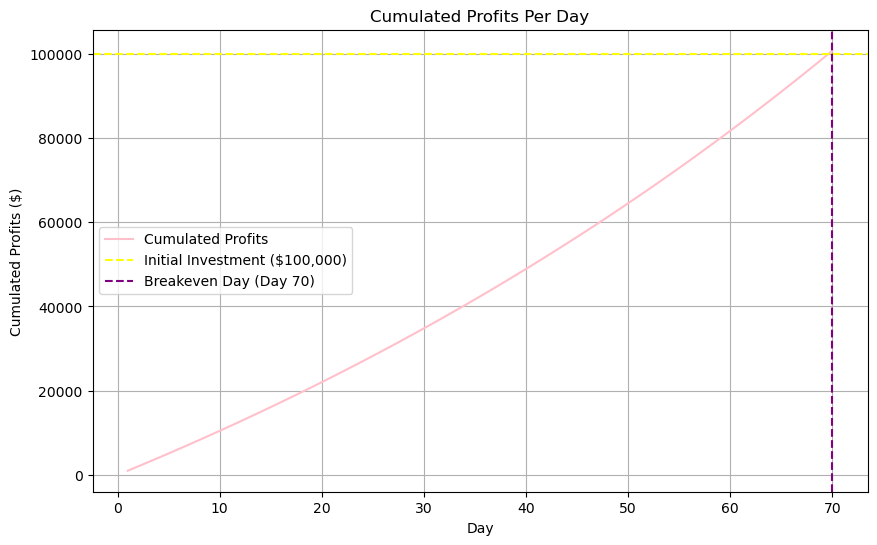

It will take 70 days to repay the initial investment.


In [19]:
# Question five
# You are about to set up a new business and will invest $100,000. On day one you expect to have 100 customers and the number ofcustomers
# will grow at a rate of 1% per day. If each customer provides profits of $10, how many days will it take to repay your initial investment
#based on cumulated profits? Plot cumulated profits per day, show initial investment and mark breakeven day.

#***********************Solution****************************

# Given data
initial_investment = 100000
initial_customers = 100
growth_rate = 0.01
profit_per_customer = 10


days = 0
cumulated_profits = 0
profits_per_day = []
#  The loop to check if the profits exceed the initial investment
while cumulated_profits < initial_investment:
    days += 1
    #  Calculation of the number of daily customers
    customers_today = initial_customers * (1 + growth_rate) ** (days - 1)
    # Calculation the daily profit  
    profit_today = customers_today * profit_per_customer
    cumulated_profits += profit_today
    profits_per_day.append(cumulated_profits)


plt.figure(figsize=(10, 6))
plt.plot(range(1, days + 1), profits_per_day, label="Cumulated Profits", color='pink')
plt.axhline(y=initial_investment, color='yellow', linestyle='--', label="Initial Investment ($100,000)")
plt.axvline(x=days, color='purple', linestyle='--', label=f"Breakeven Day (Day {days})")
plt.title("Cumulated Profits Per Day")
plt.xlabel("Day")
plt.ylabel("Cumulated Profits ($)")
plt.legend()
plt.grid(True)
plt.show()


print(f"It will take {days} days to repay the initial investment.")


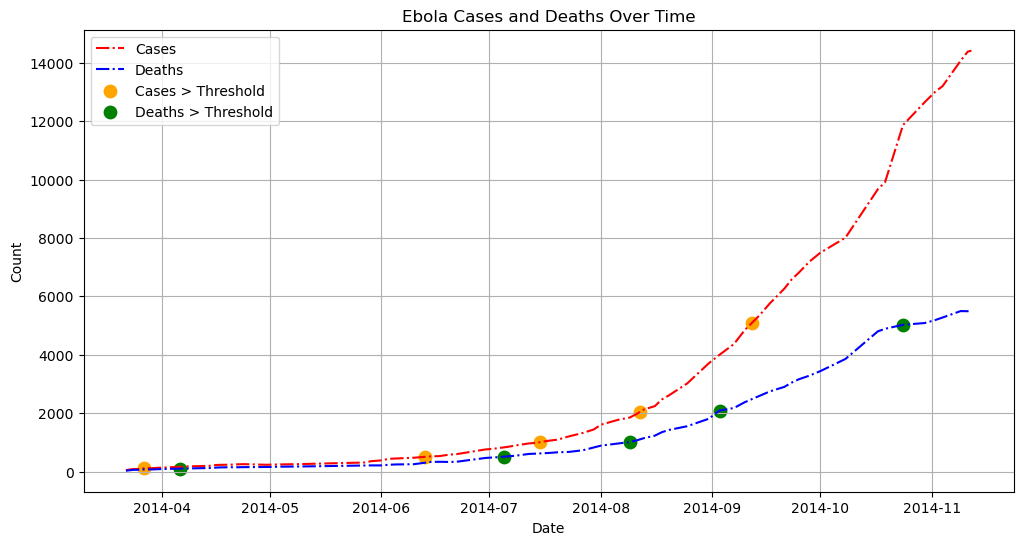

In [20]:
# Question six
# Using data from http://bit.ly/1JJyf29 and linear interpolation, estimate the dates when the number of cases and deaths due to Ebola
# exceeded 100, 500, 1000, 2000 and 5000. Graph the cases and deaths (observations and interpolations) and mark the dates when
# thresholds were exceeded with a circle.


#***********************Solution****************************

ebola_df = pd.read_excel('ebola_data.xls')

# Missing dates and interpolation of missing values
full_date_range = pd.date_range(start=ebola_df['Date'].min(), end=ebola_df['Date'].max())
ebola_df = ebola_df.set_index("Date").reindex(full_date_range).reset_index()
ebola_df.columns.values[0] = "Date"

# Interpolating missing values for relevant columns
for col in ['Cases', 'Death', 'Diff', 'Noofdays']:
    ebola_df[col] = ebola_df[col].interpolate(method='linear')

# Extract normalized data
cases_data = ebola_df['Cases']
deaths_data = ebola_df['Death']
date_values = pd.to_datetime(ebola_df['Date'], format='%d/%m/%y')

# Plot cases and deaths over time
plt.figure(figsize=(12, 6))
plt.plot(date_values, cases_data, linestyle='dashdot', label='Cases', color='red')
plt.plot(date_values, deaths_data, linestyle='dashdot', label='Deaths', color='blue')

# Define thresholds and find the first date where the threshold is exceeded
threshold_values = [100, 500, 1000, 2000, 5000]
case_threshold_dates = []
case_threshold_values = []
death_threshold_dates = []
death_threshold_values = []

for threshold in threshold_values:
    # Find first date and value where cases exceed the threshold
    case_index = next((i for i, val in enumerate(cases_data) if val > threshold), None)
    if case_index is not None:
        case_threshold_dates.append(date_values[case_index])
        case_threshold_values.append(cases_data[case_index])

    # Find first date and value where deaths exceed the threshold
    death_index = next((i for i, val in enumerate(deaths_data) if val > threshold), None)
    if death_index is not None:
        death_threshold_dates.append(date_values[death_index])
        death_threshold_values.append(deaths_data[death_index])

# Scatter plot for cases and deaths above thresholds
plt.scatter(case_threshold_dates, case_threshold_values, s=80, marker='o', color='orange', label='Cases > Threshold')
plt.scatter(death_threshold_dates, death_threshold_values, s=80, marker='o', color='green', label='Deaths > Threshold')

# Customize and display the plot
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Ebola Cases and Deaths Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Question seven
#Using data from 2014, downloaded in the previous question, what is the average growth rate per day, as a percentage, in the number
#of Ebola cases and deaths?

#***********************Solution****************************
# Calculate daily percentage change for 'Cases' and 'Deaths'
cases_pct_change = ebola_df['Cases'].pct_change() * 100
deaths_pct_change = ebola_df['Death'].pct_change() * 100

# Calculate mean growth rates
mean_cases_growth_rate = cases_pct_change.mean()
mean_deaths_growth_rate = deaths_pct_change.mean()

# Output the results
print(f"Average cases growth rate: {mean_cases_growth_rate:.2f}%")
print(f"Average deaths growth rate: {mean_deaths_growth_rate:.2f}%")

Average cases growth rate: 2.51%
Average deaths growth rate: 2.33%


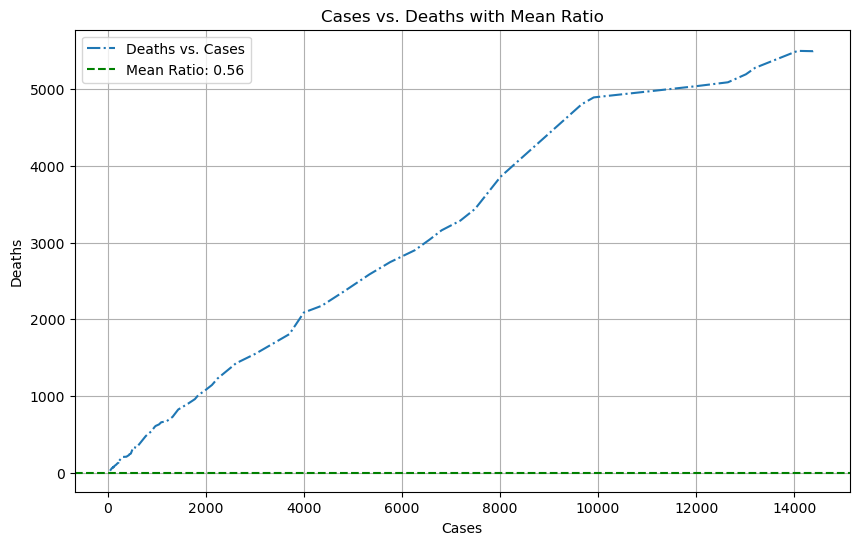

In [22]:
# Question eight
# Using the same date, plot the number of deaths versus the number of cases and estimate the average ratio of Ebola deaths to cases.

#***********************Solution****************************

import numpy as np
import matplotlib.pyplot as plt

# Create the plot and plot 'Deaths' vs. 'Cases'
plt.figure(figsize=(10, 6))
plt.plot(cases_data, deaths_data, linestyle='dashdot', label='Deaths vs. Cases')

# Calculate the mean ratio of 'Deaths' to 'Cases'
mean_death_case_ratio = np.mean(deaths_data / cases_data)

# Add a horizontal line representing the mean ratio
plt.axhline(y=mean_death_case_ratio, color='green', linestyle='--', label=f'Mean Ratio: {mean_death_case_ratio:.2f}')

# Customize and display the plot
plt.title('Cases vs. Deaths with Mean Ratio')
plt.xlabel('Cases')
plt.ylabel('Deaths')
plt.grid(True)
plt.legend()
plt.show()

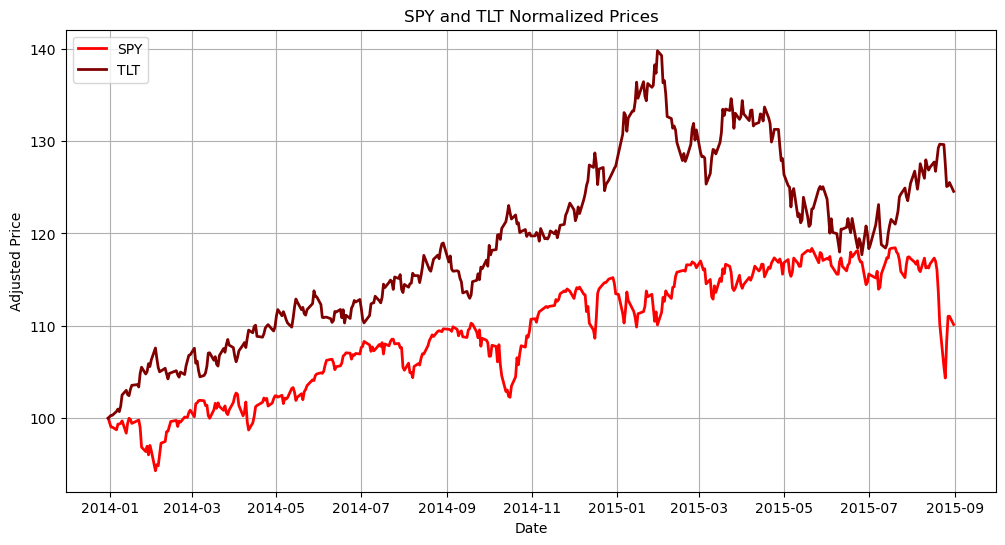

In [23]:
# Question nine
# Obtain daily prices for two ETFs called SPY and TLT which track the S&P500 index and long-term Treasury Bond. Select the adjusted
# closing prices. Plot the two time series during 12/31/2013– 08/31/2015 and make them comparable by starting from prices of $100 on
# the first day in 12/31/2013 – 08/31/2015.

#***********************Solution****************************
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare the SPY data
spy_raw_data = pd.read_csv('SPY.csv', parse_dates=['Date'])
spy_selected_data = spy_raw_data[['Date', 'Adj Close']]
spy_data_prepared = spy_selected_data.set_index('Date')

# Load and prepare the TLT data
tlt_raw_data = pd.read_csv('TLT.csv', parse_dates=['Date'])
tlt_selected_data = tlt_raw_data[['Date', 'Adj Close']]
tlt_data_prepared = tlt_selected_data.set_index('Date')

# Normalize both SPY and TLT data
spy_normalized = spy_data_prepared / spy_data_prepared.iloc[0] * 100
tlt_normalized = tlt_data_prepared / tlt_data_prepared.iloc[0] * 100

# Plot the normalized prices of SPY and TLT
plt.figure(figsize=(12, 6))

# Plotting SPY data on the plot
plt.plot(spy_normalized.index, spy_normalized['Adj Close'], label='SPY', linewidth=2, color='red')

# Plotting TLT data on the same plot
plt.plot(tlt_normalized.index, tlt_normalized['Adj Close'], label='TLT', linewidth=2, color='maroon')

# Adding labels and title
plt.title('SPY and TLT Normalized Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Price')
plt.legend(loc='upper left')

# Display the grid and show the plot
plt.grid(True)
plt.show()

In [24]:
# Question ten
# For the ETFs on the previous question, calculate daily returns, r(t)= p(t)/p(t-1)-1, for each trading day in the same time period as
# above. Calculate the average, min and max daily return for each of the two ETFs during the time period and express these as
# percentages.

#***********************Solution****************************
import pandas as pd

# Calculation of daily returns for SPY
spy_daily_returns = (spy_normalized / spy_normalized.shift(1) - 1) * 100

# Calculation of daily returns for TLT
tlt_daily_returns = (tlt_normalized / tlt_normalized.shift(1) - 1) * 100

# The Summary for SPY daily returns
print("SPY's daily returns summary")
print("---------------------------")
print(f"Average daily return: {spy_daily_returns.mean().iloc[0]:.2f}%")
print(f"Minimum daily return: {spy_daily_returns.min().iloc[0]:.2f}%")
print(f"Maximum daily return: {spy_daily_returns.max().iloc[0]:.2f}%")
print("\n")

# The Summary for TLT daily returns
print("TLT's daily returns summary")
print("---------------------------")
print(f"Average daily return: {tlt_daily_returns.mean().iloc[0]:.2f}%")
print(f"Minimum daily return: {tlt_daily_returns.min().iloc[0]:.2f}%")
print(f"Maximum daily return: {tlt_daily_returns.max().iloc[0]:.2f}%")

SPY's daily returns summary
---------------------------
Average daily return: 0.03%
Minimum daily return: -4.21%
Maximum daily return: 3.84%


TLT's daily returns summary
---------------------------
Average daily return: 0.06%
Minimum daily return: -2.43%
Maximum daily return: 2.65%
